In [1]:
import pandas as pd
import numpy as np

# Generate a larger sample dataset with 100 rows
np.random.seed(42)

# Random values for each column
monthly_income = np.random.randint(2500, 6000, 100)
electricity_expense = np.random.randint(50, 100, 100)
gas_expense = np.random.randint(20, 50, 100)
water_expense = np.random.randint(15, 40, 100)
sewer_expense = np.random.randint(10, 35, 100)
internet_expense = np.random.randint(30, 80, 100)
cable_expense = np.random.randint(30, 70, 100)
premiums_subscriptions = np.random.randint(20, 50, 100)

# Calculate total utility expense
total_utility_expense = (electricity_expense + gas_expense + water_expense +
                         sewer_expense + internet_expense + cable_expense +
                         premiums_subscriptions)

# Random payment timeliness (On-time or Late)
payment_timeliness = np.random.choice(['On-time', 'Late'], 100)

# Random default risk (Low, Medium, High)
default_risk = np.random.choice(['Low', 'Medium', 'High'], 100)

# Create the dataframe
data = {
    'User_ID': range(1, 101),
    'Monthly_Income': monthly_income,
    'Electricity_Expense': electricity_expense,
    'Gas_Expense': gas_expense,
    'Water_Expense': water_expense,
    'Sewer_Expense': sewer_expense,
    'Internet_Expense': internet_expense,
    'Cable_Expense': cable_expense,
    'Premiums/Subscriptions': premiums_subscriptions,
    'Total_Utility_Expense': total_utility_expense,
    'Payment_Timeliness': payment_timeliness,
    'Default_Risk': default_risk
}

df_large = pd.DataFrame(data)

# Display the first few rows of the generated data
df_large.head()


,User_ID,Monthly_Income,Electricity_Expense,Gas_Expense,Water_Expense,Sewer_Expense,Internet_Expense,Cable_Expense,Premiums/Subscriptions,Total_Utility_Expense,Payment_Timeliness,Default_Risk
0,1,5674,89,26,22,30,57,39,32,295,Late,Low
1,2,3360,70,49,21,15,55,55,32,297,On-time,Medium
2,3,3794,65,20,32,12,66,63,37,295,On-time,Medium
3,4,3630,94,20,22,18,55,36,47,292,On-time,High
4,5,3595,67,44,15,14,52,33,49,274,Late,High


In [5]:
df_large.head(100)

,User_ID,Monthly_Income,Electricity_Expense,Gas_Expense,Water_Expense,Sewer_Expense,Internet_Expense,Cable_Expense,Premiums/Subscriptions,Total_Utility_Expense,Payment_Timeliness,Default_Risk
0,1,5674,89,26,22,30,57,39,32,295,Late,Low
1,2,3360,70,49,21,15,55,55,32,297,On-time,Medium
2,3,3794,65,20,32,12,66,63,37,295,On-time,Medium
3,4,3630,94,20,22,18,55,36,47,292,On-time,High
4,5,3595,67,44,15,14,52,33,49,274,Late,High
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4817,69,39,17,19,46,39,22,251,On-time,High
96,97,3315,79,26,31,28,55,55,48,322,On-time,Low
97,98,5842,60,39,31,26,37,48,25,266,On-time,High
98,99,2955,77,28,26,33,58,68,37,327,On-time,High


In [8]:

from google.colab import files
df_large.to_csv('df_large.csv', encoding = 'utf-8-sig')
files.download('df_large.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:50:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 100.00%
Random Forest Accuracy: 100.00%
Gradient Boosting Accuracy: 100.00%
The model with the highest accuracy is: XGBoost with accuracy 100.00%


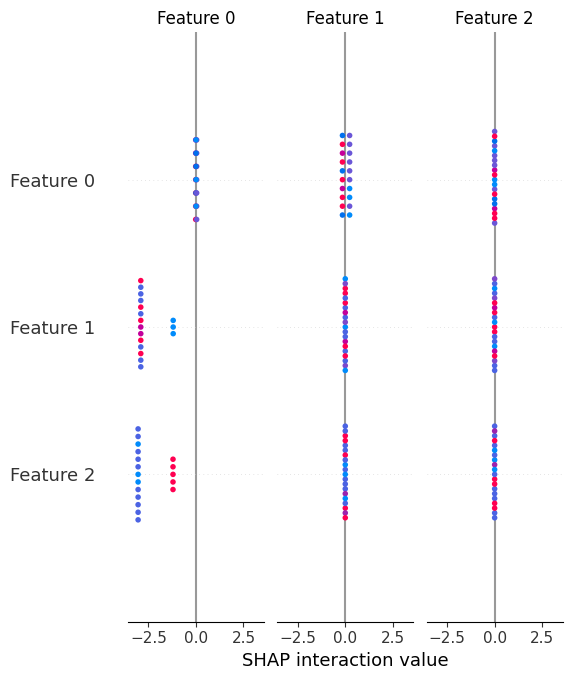

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import shap

# Sample Dataset (you should use your own dataset)
data = {
    'User_ID': range(1, 101),
    'Monthly_Income': [3500, 4200, 2800, 5000, 3200] * 20,  # Repeat data for simplicity
    'Electricity_Expense': [60, 75, 50, 90, 65] * 20,
    'Gas_Expense': [30, 35, 25, 45, 30] * 20,
    'Water_Expense': [25, 30, 20, 35, 25] * 20,
    'Sewer_Expense': [20, 25, 15, 30, 20] * 20,
    'Internet_Expense': [50, 60, 40, 70, 55] * 20,
    'Cable_Expense': [40, 50, 30, 60, 45] * 20,
    'Premium_Subscription_Expense': [10, 15, 5, 20, 10] * 20,
    'Total_Utility_Expense': [250, 310, 195, 375, 265] * 20,
    'Payment_Timeliness': ['On-time', 'Late', 'On-time', 'On-time', 'Late'] * 20,
    'Default_Risk': ['Low', 'High', 'Low', 'Low', 'Medium'] * 20
}

# Convert dataset into a pandas DataFrame
df = pd.DataFrame(data)

# Preprocessing the data
# Convert categorical variables to numerical
df['Payment_Timeliness'] = df['Payment_Timeliness'].map({'On-time': 0, 'Late': 1})
df['Default_Risk'] = df['Default_Risk'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Split into features (X) and target (y)
X = df.drop(columns=['User_ID', 'Default_Risk'])
y = df['Default_Risk']

# Normalize the data (optional, but often useful for tree-based models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model 1: XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_acc * 100:.2f}%")

# Model 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc * 100:.2f}%")

# Model 3: Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_acc * 100:.2f}%")

# Compare the models and print the highest accuracy
models = {
    'XGBoost': xgb_acc,
    'Random Forest': rf_acc,
    'Gradient Boosting': gb_acc
}

best_model = max(models, key=models.get)
print(f"The model with the highest accuracy is: {best_model} with accuracy {models[best_model] * 100:.2f}%")

# Optional: Explainability with SHAP (for the best model)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot (this is optional for model explanation)
shap.summary_plot(shap_values, X_test)
